In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.labo2 import generate_train_data, import_data
from sklearn.cluster import KMeans

import glob

In [32]:
train, test = import_data()
power_ids = train.columns[train.columns.str.match("NPWD")]
X = train.copy()
X.drop(list(power_ids), inplace = True, axis = 1) # drop power

In [29]:
X_train, X_test, y_train, y_test = generate_train_data("chrono")

(49464, 51)
(49464, 33)


In [33]:
train_1_start = "2008"
train_1_end = "2010-07-10"
train_2_start = "2010-07-11"
train_2_end = "2012-05-27"
train_3_start = "2012-05-28"
train_3_end = "2014-04-14"


mask_train_1 = (train.index > train_1_start) & (train.index <= train_1_end)
mask_train_2 = (train.index > train_2_start) & (train.index <= train_2_end)
mask_train_3 = (train.index > train_3_start) & (train.index <= train_3_end)

X_train_1 = X.loc[mask_train_1]
X_train_2 = X.loc[mask_train_2]
X_train_3 = X.loc[mask_train_3]


In [7]:
np.shape(X_train)

(32977, 51)

In [45]:
k = 2
# Choix des options
kmeans_1 = KMeans(n_clusters=k, random_state=42)
# Exécution de l'algorithme
y_pred = kmeans_1.fit_predict(X_train_1)

# Choix des options
kmeans_2 = KMeans(n_clusters=k, random_state=42)
# Exécution de l'algorithme
y_pred = kmeans_2.fit_predict(X_train_2)

# Choix des options
kmeans_3 = KMeans(n_clusters=k, random_state=42)
# Exécution de l'algorithme
y_pred = kmeans_3.fit_predict(X_train_3)

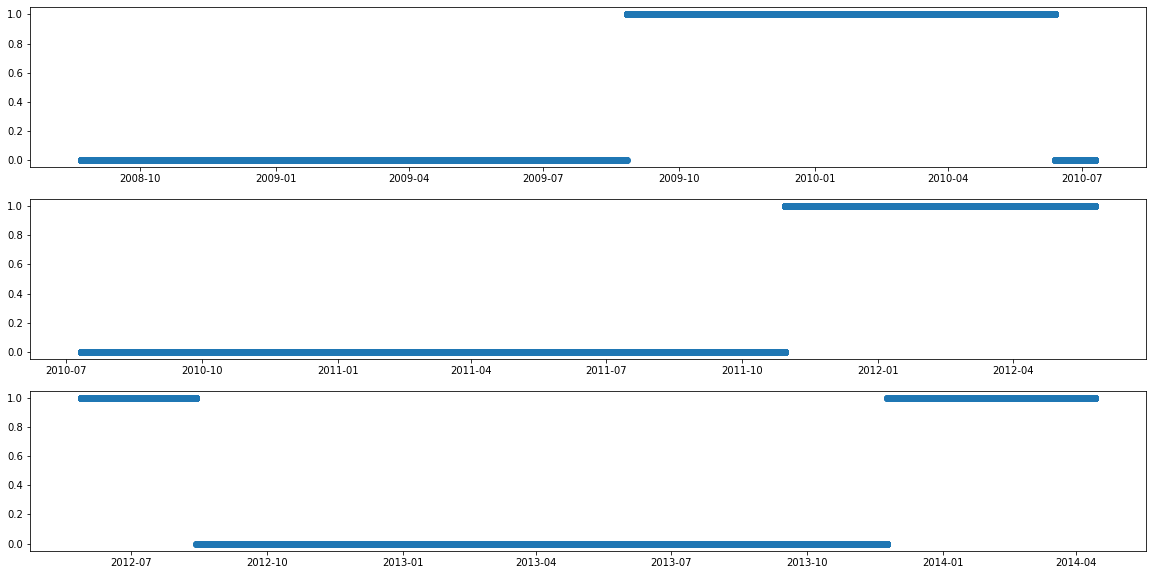

In [46]:
fig, ax = plt.subplots(3,1,figsize=(20,10))
ax[0].scatter(X_train_1.index, kmeans_1.labels_)
ax[1].scatter(X_train_2.index, kmeans_2.labels_)
ax[2].scatter(X_train_3.index, kmeans_3.labels_)

In [29]:
kmeans.cluster_centers_

array([[ 4.83728662e+00,  3.01217093e+01,  8.96533419e+01,
         1.14131661e+02,  1.98961156e-01,  8.35591689e-03,
         4.85546522e-02,  2.66485998e-02,  3.74887082e-02,
         6.41373080e-02,  3.61336947e-02,  7.90424571e-03,
         9.66576332e-02,  1.19692864e-02,  7.15898826e-02,
         2.80036134e-01,  1.49051491e-02,  5.87172538e-03,
         1.87443541e-02, -2.76471554e-18,  0.00000000e+00,
        -8.76035355e-17,  6.77506775e-04,  2.25835592e-04,
         0.00000000e+00,  5.08130081e-02,  4.74338450e-20,
         0.00000000e+00, -2.27248775e-16,  2.33987732e+08,
         2.44626493e+08,  3.62545402e+01,  5.62162208e+02,
         8.00010445e+00,  1.04669806e+01,  2.31707317e-01,
         2.73261066e-02,  9.93676603e-03,  4.51671183e-04,
        -3.57786717e-18,  4.87804878e-02,  4.91869919e-01,
         6.14272809e-02,  6.02981030e-02,  5.48780488e-02,
         1.35953026e-01,  3.16169828e-03,  2.80036134e-02,
         9.48676901e-20,  4.74338450e-20,  0.00000000e+0

In [4]:
## Séparer quanti et quali
## possible de faire un traitement avec tout le monde en même temps ?
## Matrice de corélation
## ACP

In [5]:
quali = ["commande", "type", "flagcomm", "power"]
commande = train.columns[train.columns.str.match("commande")]
type_name = train.columns[train.columns.str.match("type")]
flag = train.columns[train.columns.str.match("flagcomms")]
power = train.columns[train.columns.str.match("NPW")]
quali = np.concatenate([commande, type_name, flag, power])

train_quali = train[power[22:]]

In [6]:
train_quali

,NPWD2791,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,
2008-08-22 00:00:00,0.173411,0.000573,0.001526,0.159719,0.005753,0.005273,0.000529,0.000525,0.000762,0.006765,0.003382
2008-08-22 01:00:00,0.172980,0.000560,0.001484,0.046897,0.005607,0.005035,0.000510,0.000503,0.000728,0.006595,0.003268
2008-08-22 02:00:00,0.019940,0.000573,0.001508,0.281516,0.005685,0.005097,0.000514,0.000513,0.000731,0.006571,0.003296
2008-08-22 03:00:00,0.000238,0.000578,0.001521,0.142337,0.005745,0.005249,0.000527,0.000517,0.000747,0.006734,0.003423
2008-08-22 04:00:00,0.000003,0.000566,0.001521,0.057978,0.005753,0.005176,0.000525,0.000525,0.000740,0.006685,0.003370
...,...,...,...,...,...,...,...,...,...,...,...
2014-04-13 19:00:00,0.045320,0.001356,0.001550,0.002261,0.005825,0.579806,0.000534,0.000532,0.000753,0.006837,0.003377
2014-04-13 20:00:00,0.000143,0.001182,0.001523,0.118835,0.005763,0.558182,0.000520,0.000519,0.000740,0.006640,0.003382
2014-04-13 21:00:00,0.051208,0.001181,0.001516,0.081298,0.005716,0.381376,0.000523,0.000516,0.000744,0.006676,0.003366


In [7]:
train_quanti = train.copy()
train_quanti.drop(quali, inplace=True, axis=1)

In [8]:
%load_ext rpy2.ipython

R[write to console]: corrplot 0.84 loaded



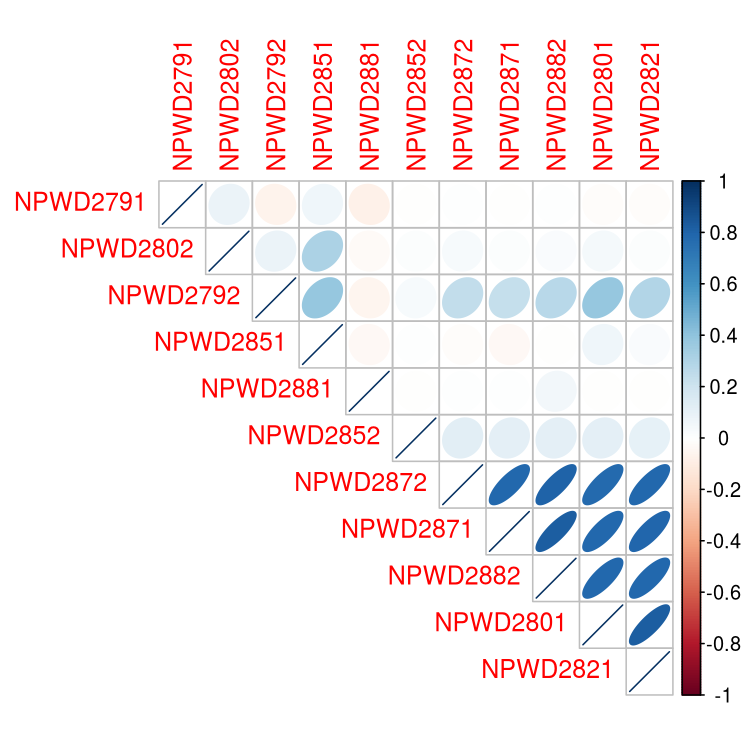

In [9]:
%%R -i train_quanti -w 5 -h 5 --units in -r 150
# Version R

library(corrplot)
mcor <- cor(train_quanti)
corrplot(mcor, type="upper", order="hclust", method="ellipse")

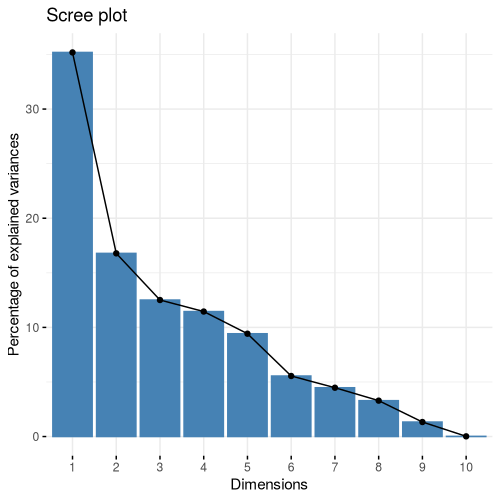

In [16]:
%%R -i train_quanti -w 5 -h 5 --units in -r 100
# Version R

library(FactoMineR)
library(factoextra)
res.pca <- PCA(train_quanti, scale.unit=TRUE, ncp=2, graph=FALSE)
fviz_eig(res.pca)
# var <- get_pca_var(pep_pca)
# print(var$contrib)
# print(get_eigenvalue(res.pca))

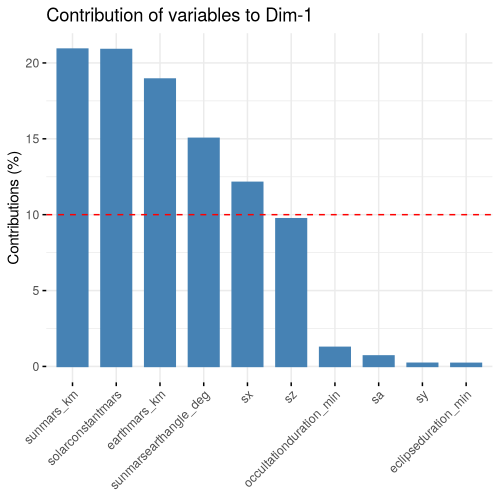

In [17]:
%%R -i train_quanti -w 5 -h 5 --units in -r 100
fviz_contrib(res.pca, choice="var", axes = 1)

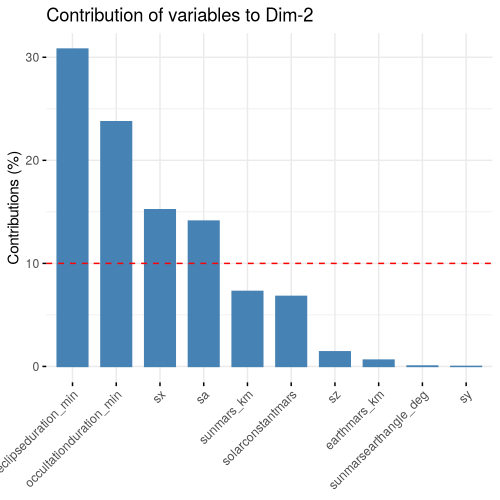

In [18]:
%%R -i train_quanti -w 5 -h 5 --units in -r 100
fviz_contrib(res.pca, choice="var", axes = 2)

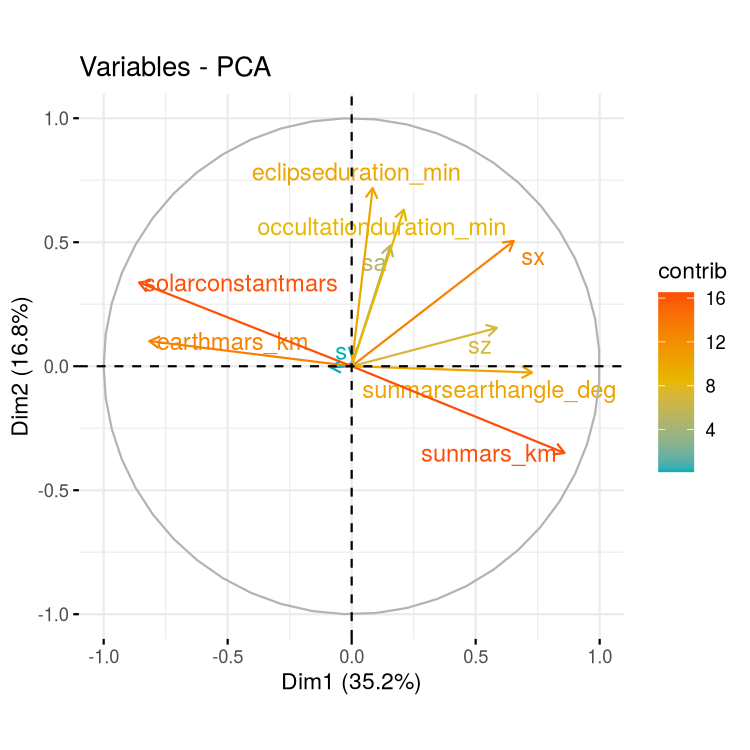

In [20]:
%%R -i train_quanti -w 5 -h 5 --units in -r 150

fviz_pca_var(res.pca,
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
             )


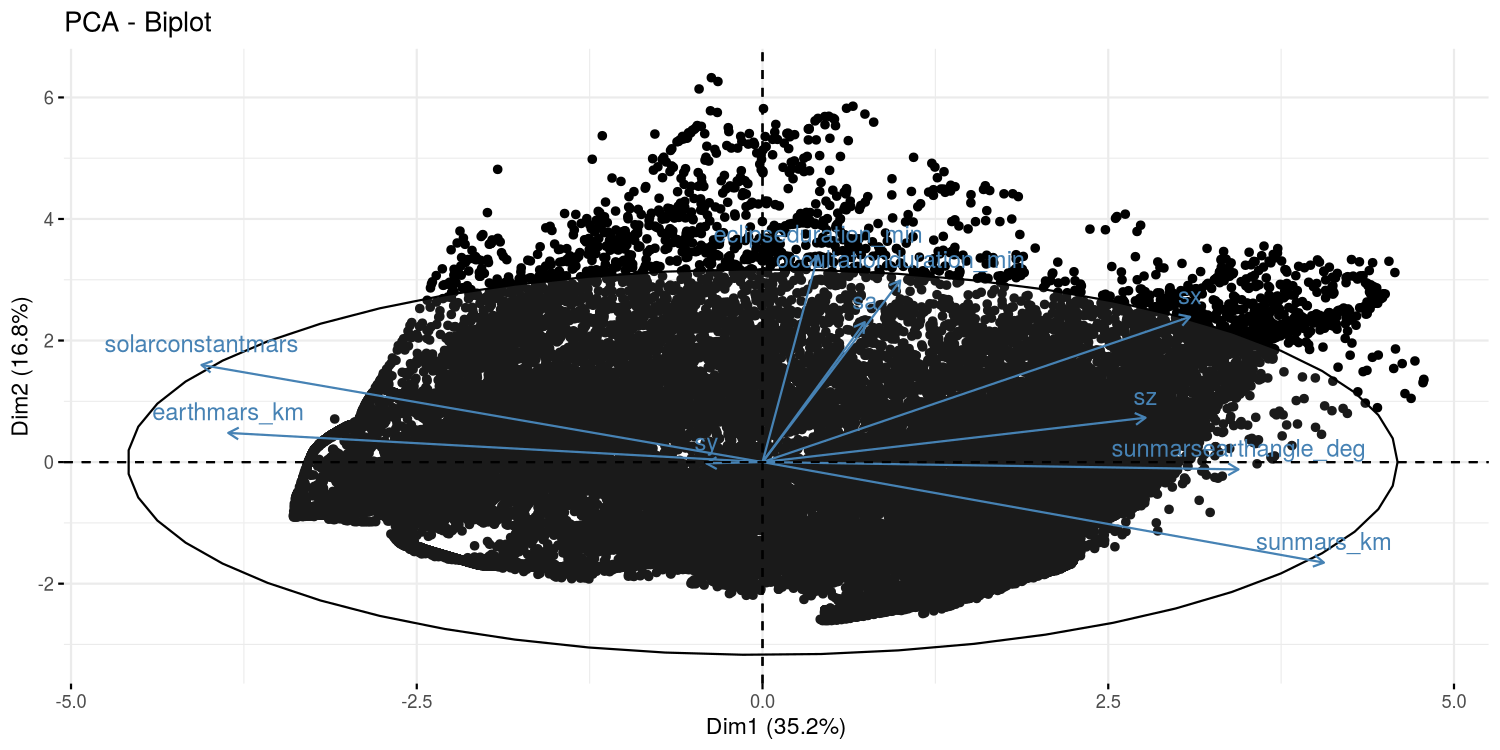

In [21]:
%%R -i train_quanti -w 10 -h 5 --units in -r 150

head(train_quanti)
fviz_pca_biplot(res.pca,
             label = "var", # hide individual labels
#              habillage = as.factor(train_quali$river_name), # color by groups
             addEllipses = TRUE # Concentration ellipses
             )